In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
mpg= sns.load_dataset("mpg")

In [4]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [6]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [7]:
mpg.shape

(398, 9)

In [27]:
mpg.dropna(subset= ["horsepower"], inplace=True)

In [9]:
x, y= mpg.drop({"mpg", "origin", "name"}, axis= "columns"), mpg["mpg"]

In [10]:
x

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,8,307.0,130.0,3504,12.0,70
1,8,350.0,165.0,3693,11.5,70
2,8,318.0,150.0,3436,11.0,70
3,8,304.0,150.0,3433,12.0,70
4,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82
394,4,97.0,52.0,2130,24.6,82
395,4,135.0,84.0,2295,11.6,82
396,4,120.0,79.0,2625,18.6,82


In [11]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
X_test.head(10)

,cylinders,displacement,horsepower,weight,acceleration,model_year
79,4,96.0,69.0,2189,18.0,72
276,4,121.0,115.0,2795,15.7,78
248,4,91.0,60.0,1800,16.4,78
56,4,91.0,70.0,1955,20.5,71
393,4,140.0,86.0,2790,15.6,82
205,4,97.0,75.0,2155,16.4,76
43,8,400.0,170.0,4746,12.0,71
235,4,97.0,75.0,2265,18.2,77
152,6,225.0,95.0,3264,16.0,75
117,4,68.0,49.0,1867,19.5,73


In [14]:
print(f"{X_train.shape= }")
print(f"{y_train.shape= }")
print(f"{X_test.shape= }")
print(f"{y_test.shape= }")

X_train.shape= (313, 6)
y_train.shape= (313,)
X_test.shape= (79, 6)
y_test.shape= (79,)


In [15]:
X_train

,cylinders,displacement,horsepower,weight,acceleration,model_year
260,6,225.0,110.0,3620,18.7,78
184,4,140.0,92.0,2572,14.9,76
174,6,171.0,97.0,2984,14.5,75
64,8,318.0,150.0,4135,13.5,72
344,4,86.0,64.0,1875,16.4,81
...,...,...,...,...,...,...
72,8,304.0,150.0,3892,12.5,72
107,6,232.0,100.0,2789,15.0,73
272,4,151.0,85.0,2855,17.6,78
352,4,98.0,65.0,2380,20.7,81


In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [17]:
scaled_X_train= scaler.transform(X_train)
scaled_X_test= scaler.transform(X_test)

print(f"{scaled_X_train.shape= }")
print(f"{scaled_X_train.min()= }")
print(f"{scaled_X_train.max()= }")

print(f"{scaled_X_test.shape= }")
print(f"{scaled_X_test.min()= }")
print(f"{scaled_X_test.max()= }")

scaled_X_train.shape= (313, 6)
scaled_X_train.min()= 0.0
scaled_X_train.max()= 1.0
scaled_X_test.shape= (79, 6)
scaled_X_test.min()= -0.0051948051948051965
scaled_X_test.max()= 1.0


In [18]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()
model.fit(scaled_X_train, y_train)

print(f"{model.intercept_= }")
print(f"{model.coef_= }")

model.intercept_= 27.715486259157817
model.coef_= array([ -0.580865  ,   0.39018741,  -0.41884721, -23.14066817,
         1.03715653,   9.12763733])


In [19]:
test_sample_features= scaled_X_test[0]
test_sample_labels= y_test.values[0]

print(f"{test_sample_features= }")
print(f"{test_sample_labels= }")

test_sample_features= array([0.2       , 0.06753247, 0.125     , 0.1633116 , 0.5952381 ,
       0.16666667])
test_sample_labels= 26.0


In [20]:
model.predict(test_sample_features.reshape(1, -1))

array([25.93279618])

In [21]:
y_pred= model.predict(scaled_X_test)
y_pred

array([25.93279618, 26.29927859, 32.96548909, 26.8544302 , 29.45372581,
       29.08699476,  7.63874768, 29.23704446, 20.87736024, 28.91582943,
       12.48503673, 23.69898277, 16.41889199, 28.19668802, 22.03967916,
       30.88152399, 21.18311073, 31.64662323, 27.91649795, 29.78148169,
       19.84374006, 34.37342564, 33.99070737, 15.02368137, 28.76984129,
       25.99468114, 20.82555389, 16.63300722, 28.50008896, 23.82955469,
       12.81866721, 23.60612254, 21.36279705, 29.88377781, 11.05575113,
       34.7003572 , 10.84515757, 26.26088449, 11.58087074,  7.71809963,
       12.77118771, 27.81143288, 34.74146456, 26.49024951, 11.3582456 ,
        9.10855962, 17.66893597, 31.4355561 , 25.43286643, 30.38576336,
       11.60450412, 25.152572  , 24.52253515, 33.49442837, 28.90462724,
       17.82504408, 20.7761521 , 23.16942494, 23.10923128, 24.6273826 ,
        7.683821  , 22.9296696 , 27.33070582, 23.09519024, 28.13950034,
       28.69699507, 26.85355066, 29.61277981, 22.23472064,  9.37

In [22]:
y_test.to_numpy()

array([26. , 21.6, 36.1, 26. , 27. , 28. , 13. , 26. , 19. , 29. , 15. ,
       19. , 16.9, 29. , 16.2, 28. , 20. , 32.4, 27.4, 35. , 22. , 44. ,
       34.1, 18. , 26. , 26. , 21. , 16. , 26. , 22. , 15. , 19.4, 19.2,
       31.6, 13. , 38. , 14. , 25. , 13. , 10. , 13. , 24. , 36. , 26. ,
       14. , 13. , 19. , 37.3, 21. , 29. , 14. , 24. , 28. , 36. , 22. ,
       16. , 20. , 20. , 25. , 25. , 12. , 22.5, 26.8, 23. , 21.1, 25. ,
       25.1, 29. , 19.9, 15. , 22. , 13. , 22. , 18. , 17.6, 28. , 15. ,
       16. , 27. ])

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

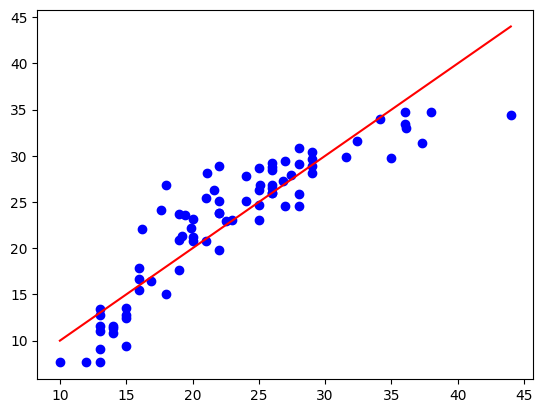

In [24]:
plt.scatter(y_test, y_pred, color= "blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red")

In [25]:
mae= mean_absolute_error(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
rmse= np.sqrt(mean_squared_error(y_test, y_pred))

In [26]:
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")

MAE: 2.5038600897761243, MSE: 10.502370329417307, RMSE: 3.2407360783342583
